In [1]:
img_directory = '/home/ec2-user/img_align_celeba'
batch_size = 32
img_size = 64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

In [3]:
import scipy as sp
from skimage.transform import resize
from skimage.util import crop
import numpy as np
import os

def load_img(id):
    filename = '%06d.jpg' % id
    path = os.path.join(img_directory, filename)
    return sp.ndimage.imread(path)

# resize smaller, cropping if necessary
def resize_crop(img, desired_dims):
    img_dims = np.array(img[:,:,0].shape)
    desired_dims = np.array(desired_dims)
    
    scale = desired_dims / img_dims
    resize_dim = np.argmax(scale)
    # this is the dim we'll resize to, the other
    # dimension will need to be cropped
       
    new_dims = (scale[resize_dim] * img_dims).astype('int_')
    img_resized = resize(img, new_dims)
    # resize the image

    # now crop along the longer dimension
    crop_dim = np.argmin(scale)
    crop_from_edge = int((new_dims[crop_dim] - desired_dims[crop_dim])/2)
    
    # assume the crop is the first dim
    crops = [[crop_from_edge, crop_from_edge], [0, 0]]
    # swap if it's not
    if (crop_dim == 1): crops = list(reversed(crops))
    # add a crop of 0 for third dim (which is really the channels dim)
    # crop fn wants list of lists, with inner list amount to cut at 
    # each edge of the dim
    crops = crops + [[0, 0]]
    img_cropped = crop(img_resized, crops)
    
    # finally, resize again in case crop_from_edge was an odd number
    img_final = resize(img_cropped, desired_dims)
    
    return img_final

In [4]:
batch = np.array([resize_crop(load_img(i+1), (img_size, img_size)) for i in range(batch_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


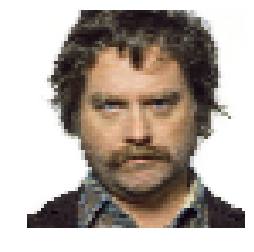

In [5]:
imshow([batch[0]])

In [6]:
from model import Vaegan
model = Vaegan(img_shape=(img_size, img_size, 3), batch_size=batch_size)

Using TensorFlow backend.


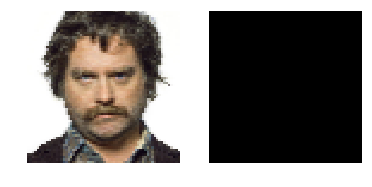

In [25]:
from os import listdir

onlyfiles = [f for f in os.listdir(save_directory) if os.path.isfile(os.path.join(save_directory, f))]
latest = max(onlyfiles)
imshow([batch[0], sp.ndimage.imread(os.path.join(save_directory, latest))])

In [10]:
save_directory = '/home/ec2-user/zack'
save_model = '/home/ec2-user/model-weights.hdf5'
save_idx = 0

In [26]:
start = save_idx
stop = save_idx + 1000

for i in range(start, stop):
    model.model.fit(x=batch, y=batch, epochs=10, batch_size=batch_size, verbose=True)
    zach = model.model.predict(batch)[0]
    path = os.path.join(save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, zach)
    save_idx = i
    
# model.model.save_weights(save_model)

Epoch 1/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 2/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 3/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 4/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 5/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 6/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 7/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 8/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 9/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 10/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 1/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 2/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 3/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 4/10
32/32 [==============================] - 0s - loss: 8.5739
Epoch 5/10
32/32 [=

KeyboardInterrupt: 